In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
# Read in the data
df=pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Filter the DF to only the currency that is currently being traded. 
IsTrading_df=df[df['IsTrading']==True]
IsTrading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
# Drop IsTrading Column
IsTrading_df=IsTrading_df.drop('IsTrading', 1).drop('Unnamed: 0', 1)
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
IsTrading_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
#Drop null values
IsTrading_df=IsTrading_df.dropna()
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
#Filter mined coins
IsTrading_df = IsTrading_df[IsTrading_df['TotalCoinsMined'] > 0]
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
#Save and Drop CoinName column
CoinName=pd.DataFrame(IsTrading_df['CoinName']).reset_index(drop=True)
CoinName

IsTrading_df=IsTrading_df.drop('CoinName', 1)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
ColumnsToBeEncoded=['Algorithm', 'ProofType']
for column in ColumnsToBeEncoded:
    le=LabelEncoder()
    IsTrading_df[column] = le.fit_transform(IsTrading_df[column].values)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
2,52,15,1.055185e+09,532000000
5,66,15,2.927942e+10,314159265359
7,47,12,1.792718e+07,21000000
8,20,12,1.076842e+08,0
...,...,...,...,...
1238,47,1,2.000000e+09,2000000000
1242,52,15,1.493105e+07,250000000
1245,10,12,9.802226e+08,1400222610
1246,18,12,7.296538e+06,21000000


In [12]:
# Standardize the data using StandardScaler. 
scaler = StandardScaler()
scaled_IsTrading = scaler.fit_transform(IsTrading_df)
print(scaled_IsTrading[0:5])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]]


In [13]:
# Applying PCA to reduce dimensions to 90% of the explained variance. 

# Initialize PCA model
pca =PCA(n_components=0.90)

# Get principal components of the data. 
crypto_pca = pca.fit_transform(scaled_IsTrading)

In [14]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal componenet 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal componenet 3
0,-0.417875,0.810296,0.372138
1,-0.396564,0.815135,0.373256
2,3.124076,2.209780,0.504335
3,-0.192083,0.016266,-0.072910
4,-0.044116,-1.167492,1.012525


In [15]:
# Fetch the explained variance.
pca.explained_variance_ratio_

array([0.4350467 , 0.28670411, 0.20538956])

In [16]:
# Perform t-SNE on the PCA data
tsne = TSNE(learning_rate = 100)
transformed_crypto = tsne.fit_transform(crypto_pca)
transformed_crypto[0]

array([  1.033438, -25.054024], dtype=float32)

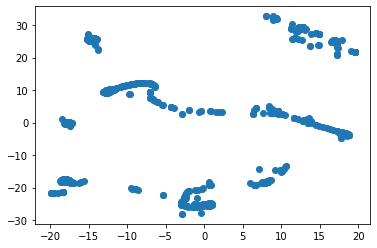

In [17]:
# Create scatter plot from t-SNE data
x = transformed_crypto[:,0]
y = transformed_crypto[:,1]
plt.scatter(x, y)
plt.show()

In [18]:
# Identify best number of clusters using elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,271045.125000
1,2,126771.781250
2,3,75533.726562
3,4,38777.660156
4,5,25053.337891


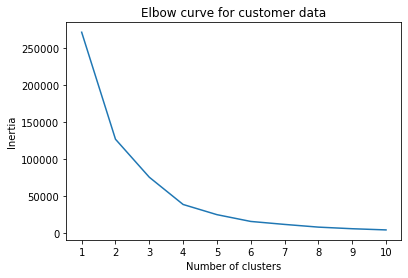

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [20]:
transform_crypto_df=pd.DataFrame(transformed_crypto).reset_index(drop=True)
transform_crypto_df

,0,1
0,1.033438,-25.054024
1,-2.207819,-21.316441
2,-0.641016,3.407469
3,-18.200867,-0.013601
4,13.516531,-0.035421
...,...,...
527,13.779955,23.625875
528,-2.731648,-24.553724
529,9.162008,3.037329
530,12.831347,0.498972


In [21]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(transformed_crypto)

# Predict clusters
predictions = model.predict(transformed_crypto)

# Add class column to the DF
transform_crypto_df['class']=model.labels_

predictions

array([0, 0, 2, 3, 2, 3, 0, 2, 2, 2, 1, 2, 0, 1, 3, 0, 3, 3, 0, 0, 2, 2,
       3, 3, 3, 0, 3, 2, 3, 0, 3, 0, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 3,
       3, 2, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 3, 0, 3, 2, 1, 3, 0, 1, 0, 3,
       3, 3, 0, 2, 0, 0, 0, 3, 3, 3, 1, 0, 3, 1, 3, 1, 0, 3, 3, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 1, 3, 0, 0, 2, 2, 1, 1, 3, 0, 2, 3, 1, 3, 0, 3,
       1, 3, 0, 0, 3, 3, 1, 2, 3, 3, 0, 3, 2, 3, 3, 3, 0, 0, 3, 2, 3, 0,
       3, 1, 3, 3, 1, 2, 0, 2, 0, 0, 3, 3, 2, 3, 2, 0, 0, 3, 0, 3, 2, 0,
       1, 3, 2, 3, 3, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 2, 0, 3, 1, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 0, 3, 1, 3, 0, 3, 0, 1, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 3, 3, 3, 0, 1, 0, 0, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 0, 3, 0, 2, 1,
       0, 3, 1, 3, 2, 0, 3, 2, 1, 2, 0, 2, 0, 3, 1, 0, 2, 1, 0, 0, 0, 0,
       1, 0, 3, 1, 3, 1, 0, 3, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3,
       0, 3, 3, 3, 0, 2, 0, 3, 2, 2, 1, 3, 0, 3, 0,

In [22]:
transform_crypto_df

,0,1,class
0,1.033438,-25.054024,0
1,-2.207819,-21.316441,0
2,-0.641016,3.407469,2
3,-18.200867,-0.013601,3
4,13.516531,-0.035421,2
...,...,...,...
527,13.779955,23.625875,1
528,-2.731648,-24.553724,0
529,9.162008,3.037329,2
530,12.831347,0.498972,2


In [23]:
clustered_df=pd.concat([CoinName, transform_crypto_df],axis=1, sort=False)
# clustered_df=CoinName_df.join(transform_crypto_df, how='outer')
print(clustered_df.shape)
clustered_df

(532, 4)


,CoinName,0,1,class
0,42 Coin,1.033438,-25.054024,0
1,404Coin,-2.207819,-21.316441,0
2,EliteCoin,-0.641016,3.407469,2
3,Bitcoin,-18.200867,-0.013601,3
4,Ethereum,13.516531,-0.035421,2
...,...,...,...,...
527,ZEPHYR,13.779955,23.625875,1
528,Gapcoin,-2.731648,-24.553724,0
529,Beldex,9.162008,3.037329,2
530,Horizen,12.831347,0.498972,2


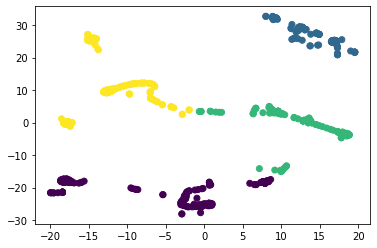

In [24]:
plt.scatter(clustered_df[0], clustered_df[1], c=clustered_df['class'])
plt.show()

In [27]:
cluster1=clustered_df[clustered_df['class']==0]
cluster1

,CoinName,0,1,class
0,42 Coin,1.033438,-25.054024,0
1,404Coin,-2.207819,-21.316441,0
6,Dash,-17.905056,-17.361759,0
12,BitcoinDark,7.912852,-18.681967,0
15,KoboCoin,-19.533403,-21.657892,0
...,...,...,...,...
510,Creditbit,-8.938313,-20.534445,0
511,OKCash,7.607265,-18.243069,0
514,WhiteCoin,-2.595309,-23.047911,0
517,Triangles Coin,-18.386820,-21.443691,0


In [28]:
cluster1.to_csv("portfolio/cryptocurrencyPortfolio1.csv")

In [29]:
cluster2=clustered_df[clustered_df['class']==1]
cluster2

,CoinName,0,1,class
10,Bitshares,13.078016,28.503872,1
13,PayCoin,14.565219,27.563049,1
34,CasinoCoin,11.680050,25.983047,1
42,Exclusive Coin,16.953707,25.340923,1
50,HyperStake,9.127575,31.928089,1
...,...,...,...,...
523,Waves,19.011726,22.057686,1
524,Particl,16.567345,24.808155,1
526,Nxt,17.866829,25.548330,1
527,ZEPHYR,13.779955,23.625875,1


In [31]:
cluster2.to_csv("portfolio/cryptocurrencyPortfolio2.csv")

In [32]:
cluster3=clustered_df[clustered_df['class']==2]
cluster3

,CoinName,0,1,class
2,EliteCoin,-0.641016,3.407469,2
4,Ethereum,13.516531,-0.035421,2
7,Monero,10.107940,2.775551,2
8,Ethereum Classic,13.667703,0.121958,2
9,ZCash,12.831371,0.499019,2
...,...,...,...,...
518,Vollar,13.394969,0.493933,2
520,Reality Clash,13.505861,-0.044104,2
525,BitTorrent,0.781551,3.513954,2
529,Beldex,9.162008,3.037329,2


In [38]:
cluster3.to_csv("portfolio/cryptocurrencyPortfolio3.csv")

In [34]:
cluster4=clustered_df[clustered_df['class']==3]
cluster4

,CoinName,0,1,class
3,Bitcoin,-18.200867,-0.013601,3
5,Litecoin,-9.011323,12.001667,3
14,ProsperCoin,-12.059636,9.641951,3
16,Spreadcoin,-14.582005,25.959335,3
17,Argentum,-10.918037,10.941819,3
...,...,...,...,...
496,Crypto Escudo,-6.983804,9.467690,3
500,Crown Coin,-17.945799,-0.506803,3
502,SmileyCoin,-4.256469,4.861152,3
508,Bata,-12.912602,9.789543,3


In [37]:
cluster4.to_csv("portfolio/cryptocurrencyPortfolio4.csv")